# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

https://github.com/ultralytics/yolov5

# Lable by 

https://roboflow.com/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Sat Mar  5 00:08:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies




fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
ERROR: Operation cancelled by user


In [4]:
import torch
import os
from IPython.display import Image, clear_output  # to display images
from yolov5 import utils
display = utils.notebook_init()  # checks

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/78.2 GB disk)
Setup complete. Using torch 1.10.0+cu111 (Tesla K80)


In [ ]:
%pip install -q roboflow

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="3m3CAjReHFawvohIpsB4")
project = rf.workspace("tuchsanai").project("catmonkey")
dataset = project.version(1).download("yolov5")

In [ ]:
!python train.py --img 416 --batch 16 --epochs 120 --data {dataset.location}/data.yaml --weights yolov5s.pt 

# Save Weight

In [ ]:
!cp "/content/yolov5/yolov5/runs/train/exp/weights/best.pt"    "/content/drive/MyDrive/best.pt"



# Inference

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies


Cloning into 'yolov5'...
remote: Enumerating objects: 11162, done.
remote: Total 11162 (delta 0), reused 0 (delta 0), pack-reused 11162
Receiving objects: 100% (11162/11162), 11.14 MiB | 17.21 MiB/s, done.
Resolving deltas: 100% (7711/7711), done.
/content/yolov5
     |████████████████████████████████| 596 kB 13.2 MB/s 


In [6]:
import torch
import os

In [7]:
weight_path = "/content/drive/MyDrive/best.pt"

# Upload model

In [8]:

model = torch.hub.load('/content/yolov5', 'custom', path=weight_path , source='local') 

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [9]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline

file = "/content/drive/MyDrive/152_478_AI_2564_2/YoloMinidata/cats_094.jpg"

img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

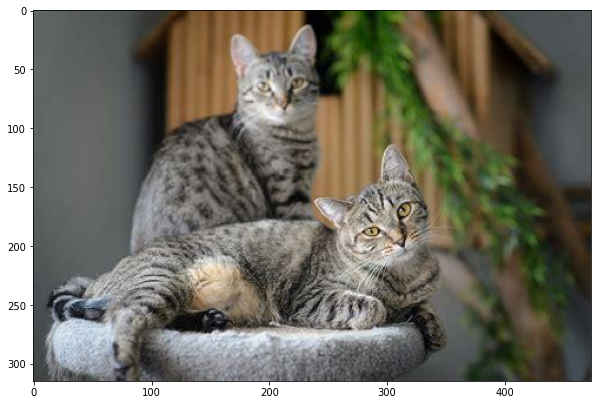

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [11]:
results1 = model(img, size=416)
df1 = results1.pandas().xyxy[0]

df1

,xmin,ymin,xmax,ymax,confidence,class,name
0,103.112427,6.766754,246.877441,202.326019,0.369814,0,cat


In [12]:
Dictdata =  results1.pandas().xyxy[0].to_dict('index')
Dictdata 




{0: {'class': 0,
  'confidence': 0.3698139786720276,
  'name': 'cat',
  'xmax': 246.87744140625,
  'xmin': 103.1124267578125,
  'ymax': 202.32601928710938,
  'ymin': 6.766754150390625}}

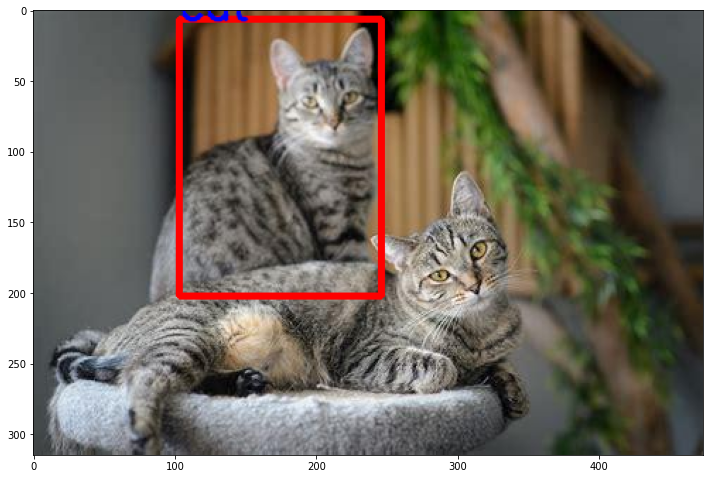

In [13]:
image = img.copy()

# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 3
  
cropimage = []  

for key, x in Dictdata.items():

    if x['confidence'] > 0.3 :
      start_point = ( int(x['xmin']), int(x['ymin']) )
      end_point   = ( int(x['xmax']), int(x['ymax']) )
      image = cv2.rectangle(image, start_point, end_point, color, thickness)

      text = x['name']
      image = cv2.putText(image, text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA, False)

     
plt.figure(figsize=(12,12))
plt.imshow(  image )